In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

/Users/francybayona/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/francybayona/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/francybayona/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/francybayona/opt/anaconda3/lib/python3.7/s

In [3]:
company = 'FB'
start = dt.datetime(2012,1,1)
end = dt.datetime(2021,3,9)

In [4]:
data = web.DataReader(company, 'stooq', start, end)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [6]:
prediction_days = 10

In [7]:
x_train = []
y_train = []

In [8]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [11]:
model = Sequential()

In [12]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.add(Dropout(0.2))

In [14]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [15]:
model.add(Dense(units=1)) #Prediction of the next clossing value

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
2205/2205 [==============================] - 3s 1ms/sample - loss: 0.0183
Epoch 2/25
2205/2205 [==============================] - 1s 538us/sample - loss: 0.0027
Epoch 3/25
2205/2205 [==============================] - 1s 539us/sample - loss: 0.0023
Epoch 4/25
2205/2205 [==============================] - 1s 537us/sample - loss: 0.0021
Epoch 5/25
2205/2205 [==============================] - 1s 555us/sample - loss: 0.0021
Epoch 6/25
2205/2205 [==============================] - 1s 567us/sample - loss: 0.0020
Epoch 7/25
2205/2205 [==============================] - 1s 593us/sample - loss: 0.0022
Epoch 8/25
2205/2205 [==============================] - 1s 559us/sample - loss: 0.0018
Epoch 9/25
2205/2205 [==============================] - 1s 553us/sample - loss: 0.0019
Epoch 10/25
2205/2205 [==============================] - 1s 548us/sample - loss: 0.0018
Epoch 11/25
2205/2205 [==============

''' Test The Model Accuaracy on Existing Data '''

In [18]:
#Load Test Data
test_start = dt.datetime(2021,3,9)
test_end = dt.datetime.now()

In [19]:
test_data = web.DataReader(company, 'stooq', test_start, test_end)

In [20]:
actual_prices = test_data['Close'].values 

In [21]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [22]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [23]:
model_inputs = model_inputs.reshape(-1, 1)

In [24]:
model_inputs = scaler.transform(model_inputs)

In [25]:
#Make predictions on tes data
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [26]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

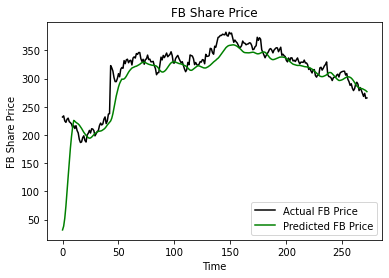

In [28]:
#plot the test predictions
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [29]:
#Predict Nex Day
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

In [30]:
prediction = model.predict(real_data)

In [31]:
prediction = scaler.inverse_transform(prediction)
print(f"Prediciton: {prediction}")

Prediciton: [[274.28983]]
